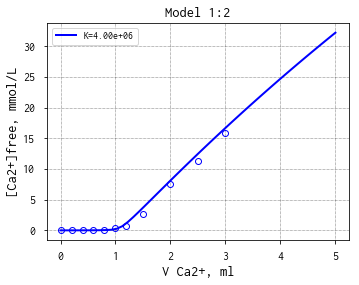

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:137: RuntimeWarning: divide by zero encountered in log10
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in log10


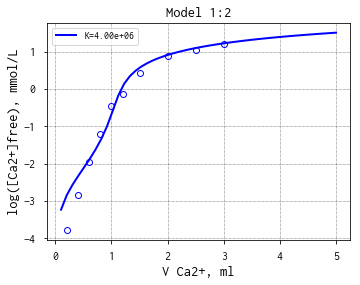

In [3]:
### ---> w liniach tak oznaczonych można zmieniać kod 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import fsolve
from scipy.optimize import curve_fit



# miareczkowanie 26.04.2019 PIA1
# V[ml],Cca2+[mmol/l]
exp1 = np.array([
[0,0],
[0.2,0.000161701],
[0.4,0.001467202],
[0.6,0.010931452],
[0.8,0.062040029],
[1,0.348811247],
[1.2,0.718480629],
[1.5,2.698241768],
[2,7.575332424],
[2.5,11.34107925],
[3,15.89928403],
])


# miareczkowanie 25.04.2019 PIA1
# V[ml],Cca2+[mmol/l]
exp2 = np.array([
[0,0],
[0.2,0.774497848],
[0.4,1.888888796],
[0.6,2.854530742],
[0.8,4.154899109],
[1.1,6.580623381],
[1.5,10.42254046],
[2,15.31351865],
[2.5,20.67738425],
[3,25.1816464],
[3.5,30.6670954],
[4,34.97290109],
[4.5,40.63890175],
[5,45.48306156]
])


### --->  gdzie są dane z miareczkowania np. exp1 exp2 ...:
dataset = exp1

### ---> testowana stała wiązania
K = 4e6



# V początkowa roztworu polimeru, L
V0 = 25/1000.0

# stężenie początkowe polimeru, mol/L
cP = ((75/1000)/130)/V0

# stężenie Ca2+ w biurecie, mol/L
cL = 0.25

# początek i koniec miareczkowania
# objęctość Ca+2, L
VL0 = 0
VL1 = 5/1000

# liczba kroków miareczkowania
N = 50

# MODEL1
# stechiomeria 1:1 Ca2+(L):COOH(P) 
def model11(vars,K,L0,P0):
    x = vars[0]
    eq1 = x - K*(L0-x)*(P0-x)
    return [eq1]

# MODEL2
# stechiomeria 1:2 Ca2+(L):COOH(P) 

def model12(vars,K,L0,P0):
    x = vars[0]
    eq1 = x - K*(L0-x)*(P0-2*x)**2
    return [eq1]


VVL = np.linspace(VL0,VL1,N)
data = np.zeros((7,N))
i = 0
for VL in VVL:
    guess = [1e-3]
    Vtotal = V0 + VL
    nL0 = VL*cL
    nP0 = V0*cP
    L0 = nL0/Vtotal
    P0 = nP0/Vtotal

    ### ---> PARAMETR2 model 1:1 lub 1:2
    # model11 lub model12
    x, = fsolve(model12, guess, args=(K,L0, P0))

    Lb = x
    Lf = L0 - Lb
    nLb = Lb*Vtotal
    nLf = Lf*Vtotal

    data[0,i] = Vtotal
    data[1,i] = VL
    data[2,i] = nL0
    data[3,i] = nLf
    data[4,i] = nLb
    data[5,i] = Lf
    data[6,i] = Lb        
    i = i + 1

plt.plot(data[1,:]*1000, data[5,:]*1000,'b-',label="K={:.2e}".format(K))

# wykres 1
# dane doświadczalne
plt.plot(dataset[:,0], dataset[:,1],'bo',markerfacecolor='none')
plt.grid()
plt.legend()   
plt.xlabel('V Ca2+, ml')
plt.ylabel('[Ca2+]free, mmol/L')
plt.title('Model 1:2')
plt.savefig('wykres01.png', dpi=300)
plt.show()

# wykres 2
# i w układzie półlogarytmicznym:
plt.xlabel('V Ca2+, ml')
plt.ylabel('log([Ca2+]free), mmol/L')
plt.title('Model 1:2')
plt.plot(data[1,:]*1000, np.log10(data[5,:]*1000),'b-',label="K={:.2e}".format(K))
plt.plot(dataset[:,0], np.log10(dataset[:,1]),'bo',markerfacecolor='none')
plt.grid()
plt.legend() 
plt.savefig('wykres02.png', dpi=300)
plt.show()